# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction-of-Functional-API" data-toc-modified-id="Introduction-of-Functional-API-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction of Functional API</a></div><div class="lev2 toc-item"><a href="#Example-1" data-toc-modified-id="Example-1-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example-1</a></div><div class="lev2 toc-item"><a href="#Simple-Concatenation-Neural-Network-Example" data-toc-modified-id="Simple-Concatenation-Neural-Network-Example-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Simple Concatenation Neural Network Example</a></div><div class="lev2 toc-item"><a href="#Multi-output-Model" data-toc-modified-id="Multi-output-Model-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multi-output Model</a></div><div class="lev2 toc-item"><a href="#Inception-Module-Implementation" data-toc-modified-id="Inception-Module-Implementation-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Inception Module Implementation</a></div><div class="lev3 toc-item"><a href="#Example-1-From-Internet" data-toc-modified-id="Example-1-From-Internet-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Example-1 From Internet</a></div><div class="lev3 toc-item"><a href="#Example-From-Python-Deep-Learning-Keras-Book" data-toc-modified-id="Example-From-Python-Deep-Learning-Keras-Book-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Example From Python Deep Learning Keras Book</a></div><div class="lev2 toc-item"><a href="#Using-Callbacks-to-Act-On-A-Model-During-Training" data-toc-modified-id="Using-Callbacks-to-Act-On-A-Model-During-Training-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Using Callbacks to Act On A Model During Training</a></div><div class="lev2 toc-item"><a href="#TensorBoard" data-toc-modified-id="TensorBoard-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>TensorBoard</a></div><div class="lev2 toc-item"><a href="#SeparableCon2D" data-toc-modified-id="SeparableCon2D-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>SeparableCon2D</a></div>

# Introduction of Functional API

In [1]:
from tensorflow.keras import Input, layers

In [2]:
input_tensor = Input(shape=(32,)) # A tensor

In [3]:
dense = layers.Dense(32, activation='relu') # A layer is a function

In [4]:
output_tensor = dense(input_tensor) # A layer inputs a tensor and returns a tensor

2021-11-05 05:37:40.454005: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Example-1

In [5]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras import Input

Peviously, how we built our sequential model

In [6]:
seq_model = Sequential()
seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

The equivalent way, use layer as function

In [7]:
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

In [8]:
model = Model(input_tensor, output_tensor) # The Model class turns an input tensor and output tensor into a "model" variable

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 64)]              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


The only part that may seem a bit magical at this point is instantiating a Model object using only an input tensor and an output tensor. Behind the scenes, Keras retrieves every layer involved in going from input_tensor to output_tensor, bringing them together into a graph-like data structure—a Model. Of course, the reason it works is that output_tensor was obtained by repeatedly transforming input_tensor. 

<b> If you tried to build a model from inputs and outputs that weren’t related, you’d get a RuntimeError: </b>

In [10]:
unrelated_input = Input(shape=(32,))
bad_model = model = Model(unrelated_input, output_tensor)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name='input_2'), name='input_2', description="created by layer 'input_2'") at layer "dense_4". The following previous layers were accessed without issue: []

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
import numpy as np
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))
model.fit(x_train, y_train, epochs=10, batch_size=128)
score = model.evaluate(x_train, y_train)

2021-11-05 05:37:54.549284: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
8/8 [==============================] - 0s 1ms/step - loss: 11.8819
Epoch 2/10
8/8 [==============================] - 0s 2ms/step - loss: 12.9022
Epoch 3/10
8/8 [==============================] - 0s 902us/step - loss: 14.4794
Epoch 4/10
8/8 [==============================] - 0s 1ms/step - loss: 16.4463
Epoch 5/10
8/8 [==============================] - 0s 768us/step - loss: 18.4872
Epoch 6/10
8/8 [==============================] - 0s 1ms/step - loss: 20.4081
Epoch 7/10
8/8 [==============================] - 0s 877us/step - loss: 22.5551
Epoch 8/10
8/8 [==============================] - 0s 1ms/step - loss: 25.2627
Epoch 9/10
8/8 [==============================] - 0s 1ms/step - loss: 28.4978
Epoch 10/10
32/32 [==============================] - 0s 626us/step - loss: 34.1941


## Simple Concatenation Neural Network Example

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import Input

In [28]:
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500
# note, we didn't look for the top words, meaning, the top_words = text_vocabulary_size or question_vocabulary_size, since, if we set
# top_words = 100, for example, then our inputs
# text = np.random.randint(1, text_vocabulary_size, 
#                         size=(num_samples, max_length))
# may generate some words that are not those top 100 words, thus run into error.    

text_input = Input(shape=(None,), dtype='int32', name='text')
#embedded_text = layers.Embedding(64, text_vocabulary_size)(text_input) # There is a bug in the book's code, should switch the order of arguments

embedded_text = layers.Embedding(text_vocabulary_size, 64)(text_input) # There is a bug in the book's code, should switch the order of arguments
encoded_text = layers.LSTM(32)(embedded_text)


question_input = Input(shape=(None,),
                       dtype='int32',
                       name='question')

#embedded_question = layers.Embedding(32, question_vocabulary_size)(question_input) # There is a bug in the book's code, should switch the order of arguments

embedded_question = layers.Embedding(question_vocabulary_size, 32)(question_input) # There is a bug in the book's code, should switch the order of arguments
encoded_question = layers.LSTM(16)(embedded_question)

concatenated = layers.concatenate([encoded_text, encoded_question], axis=-1) # concat the outputs of two LSTMs, the hidden states. with shape (None, 32) and (None, 16)

answer = layers.Dense(answer_vocabulary_size, activation='softmax')(concatenated)

model = Model([text_input, question_input], answer)



In [29]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

Now, how do you train this two-input model? There are two possible APIs: you can feed the model a list of Numpy arrays as inputs, or you can feed it a dictionary that maps input names to Numpy arrays. Naturally, the latter option is available only if you give names to your inputs.

In [30]:
import numpy as np
num_samples = 1000
max_length = 100
text = np.random.randint(1, text_vocabulary_size, 
                         size=(num_samples, max_length))
question = np.random.randint(1, question_vocabulary_size, 
                             size=(num_samples, max_length))
answers = np.random.randint(0, 1, 
                            size=(num_samples, answer_vocabulary_size))

In [31]:
#model.fit([text, question], answers, epochs=10, batch_size=128)
# output will be meaningless, since we are not training meaningful inputs/outputs.
model.fit({'text': text, 'question': question}, answers, epochs=10, batch_size=128)

Epoch 1/10
8/8 [==============================] - 2s 48ms/step - loss: 0.0000e+00 - acc: 0.0010
Epoch 2/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 0s 48ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 0s 45ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 8/10
8/8 [==============================] - 0s 50ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 9/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 10/10
8/8 [==============================] - 0s 47ms/step - loss: 0.0000e+00 - acc: 0.0000e+00


## Multi-output Model

In the same way, you can use the functional API to build models with multiple outputs (or multiple heads). A simple example is a network that attempts to simultaneously predict different properties of the data, such as a network that takes as input a series of social media posts from a single anonymous person and tries to predict attributes of that person, such as age, gender, and income level (see figure 7.7).

In [32]:
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras.models import Model


In [33]:
vocabulary_size = 50000
num_income_groups = 10

In [42]:
# Embedding Preprocessing
posts_input = Input(shape=(None,), dtype='int32', name='posts')
embedded_posts = layers.Embedding(256, vocabulary_size)(posts_input)

In [35]:
# Hidden Layers
x = layers.Conv1D(128, 5, activation='relu')(embedded_posts)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.MaxPooling1D(5)(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.Conv1D(256, 5, activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(128, activation='relu')(x)

Different Output Layers

In [36]:
# Three different output layers
age_prediction = layers.Dense(1, name='age')(x)
income_prediction = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender_prediction = layers.Dense(1, activation='sigmoid', name='gender')(x)

In [37]:
model = Model(posts_input, [age_prediction, income_prediction, gender_prediction])

Importantly, training such a model requires the ability to specify different loss func- tions for different heads of the network: for instance, age prediction is a scalar regres- sion task, but gender prediction is a binary classification task, requiring a different training procedure. But because gradient descent requires you to minimize a scalar, you must combine these losses into a single value in order to train the model. The simplest way to combine different losses is to sum them all. In Keras, you can use either a list or a dictionary of losses in compile to specify different objects for different outputs; the resulting loss values are summed into a global loss, which is minimized during training.

In [38]:
model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'])

# Alternative method
model.compile(optimizer='rmsprop', loss={'age': 'mse', 
                                         'income': 'categorical_crossentropy', 
                                         'gender': 'binary_crossentropy'})

Note that very imbalanced loss contributions will cause the model representations to be optimized preferentially for the task with the largest individual loss, at the expense of the other tasks. To remedy this, you can assign different levels of importance to the loss values in their contribution to the final loss. This is useful in particular if the losses’ values use different scales. For instance, the mean squared error (MSE) loss used for the age-regression task typically takes a value around 3–5, whereas the cross- entropy loss used for the gender-classification task can be as low as 0.1. In such a situa- tion, to balance the contribution of the different losses, you can assign a weight of 10 to the crossentropy loss and a weight of 0.25 to the MSE loss.

In [40]:
model.compile(optimizer='rmsprop', loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'], loss_weights=[0.25, 1., 10.])

model.compile(optimizer='rmsprop', loss={'age': 'mse',
                                         'income': 'categorical_crossentropy',
                                         'gender': 'binary_crossentropy'}, 
              loss_weights={'age': 0.25,'income': 1., 'gender': 10.})

<b> Note the author didn't give the inputs, so there is no way to fit. </b>

In [41]:
model.fit(posts, [age_targets, income_targets, gender_targets],
          epochs=10, batch_size=64)

NameError: name 'posts' is not defined

## Inception Module Implementation

### Example-1 From Internet

[1] Understanding and Coding Inception Module in Keras: https://becominghuman.ai/understanding-and-coding-inception-module-in-keras-eb56e9056b4b

In [3]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 1558s 9us/step


In [8]:
print(X_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
from keras.utils import np_utils


In [11]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
from keras.layers import Input
input_img = Input(shape = (32, 32, 3))

In [13]:
from keras.layers import Conv2D, MaxPooling2D
tower_1 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_1 = Conv2D(64, (3,3), padding='same', activation='relu')(tower_1)
tower_2 = Conv2D(64, (1,1), padding='same', activation='relu')(input_img)
tower_2 = Conv2D(64, (5,5), padding='same', activation='relu')(tower_2)
tower_3 = MaxPooling2D((3,3), strides=(1,1), padding='same')(input_img)
tower_3 = Conv2D(64, (1,1), padding='same', activation='relu')(tower_3)

2021-11-06 01:39:37.331302: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
import keras

In [16]:
output = keras.layers.concatenate([tower_1, tower_2, tower_3], axis = 3)

In [17]:
from keras.layers import Flatten, Dense
output = Flatten()(output)
out    = Dense(10, activation='softmax')(output)

In [18]:
from keras.models import Model
model = Model(inputs = input_img, outputs = out)
# print model.summary()

In [19]:
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   256         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 32, 32, 64)   256         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 32, 32, 3)    0           input_1[0][0]                    
______________________________________________________________________________________________

In [22]:
from tensorflow.keras.optimizers import SGD
epochs = 1 #25 # use 1 for now, to speed up
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

1563/1563 [==============================] - 270s 173ms/step - loss: 1.0319 - accuracy: 0.6425 - val_loss: 1.1121 - val_accuracy: 0.6128


In [23]:
# save output to a jason and h5 file
# We can also store our model in a JSON file and store the results as HDF5 format.

from keras.models import model_from_json
import os
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights(os.path.join(os.getcwd(), 'model.h5'))

In [24]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 61.28%


### Example From Python Deep Learning Keras Book

In [1]:
from tensorflow.keras import layers
#In this branch, the striding occurs in the spatial convolution layer.

branch_a = layers.Conv2D(128, 1, activation='relu', strides=2)(x)
branch_b = layers.Conv2D(128, 1, activation='relu')(x)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_b)
branch_c = layers.AveragePooling2D(3, strides=2)(x)
branch_c = layers.Conv2D(128, 3, activation='relu')(branch_c)
branch_d = layers.Conv2D(128, 1, activation='relu')(x)
branch_d = layers.Conv2D(128, 3, activation='relu')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2)(branch_d)
output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

NameError: name 'x' is not defined

## Using Callbacks to Act On A Model During Training

When you’re training a model, there are many things you can’t predict from the start. In particular, you can’t tell how many epochs will be needed to get to an optimal vali- dation loss. The examples so far have adopted the strategy of training for enough epochs that you begin overfitting, using the first run to figure out the proper number of epochs to train for, and then finally launching a new training run from scratch using this optimal number. Of course, this approach is wasteful.

In [1]:
import keras

<ul>
    <li>Interrupts training when improvement stops</li>
    <li>Monitors the model’s validation accuracy</li>
    <li>Patience: Interrupts training when accuracy has stopped improving for more than one epoch (that is, two epochs)</li>
    <li>ModelCheckPoint: Saves the current weights after every epoch Path to the destination model file </li>
    <li>Pass validation data when fit: Note that because the callback will monitor validation loss and validation accuracy, you need to pass validation_data to the call to fit. </li>
</ul>

In [3]:
callbacks_list = [
        keras.callbacks.EarlyStopping(
            monitor='acc',
            patience=1,),
        keras.callbacks.ModelCheckpoint(
            filepath='my_model.h5',
            monitor='val_loss',
            save_best_only=True,)]

Copy a model, prepare data, otherwise you cannot run the book's code

In [20]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers
from tensorflow.keras import Input

In [21]:
input_tensor = Input(shape=(64,))
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

In [22]:
model = Model(input_tensor, output_tensor) 

In [23]:

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

import numpy as np
x = np.random.random((1000, 64)) # Return random floats in the half-open interval [0.0, 1.0). output shape is (1000, 64)
y = np.random.random((1000, 10)) 

x_val = np.random.random((100, 64)) # Return random floats in the half-open interval [0.0, 1.0). output shape is (1000, 64)
y_val = np.random.random((100, 10)) 
#score = model.evaluate(x_train, y_train)

The fit will stop after it sees the second "drop" in "acc".

In [25]:
model.fit(x, y,
          epochs=10,
          batch_size=32,
          callbacks=callbacks_list,
          validation_data=(x_val, y_val))

Epoch 1/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6905 - acc: 0.1180 - val_loss: 0.6961 - val_acc: 0.0800
Epoch 2/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6902 - acc: 0.1210 - val_loss: 0.6955 - val_acc: 0.0600
Epoch 3/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6898 - acc: 0.1360 - val_loss: 0.6956 - val_acc: 0.0700
Epoch 4/10
32/32 [==============================] - 0s 1ms/step - loss: 0.6895 - acc: 0.1240 - val_loss: 0.6957 - val_acc: 0.0600


## TensorBoard

In [26]:
import keras
from keras import layers
from keras.datasets import imdb

In [27]:
from keras.preprocessing import sequence

In [28]:
max_features = 2000
max_len = 500

In [30]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) 
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

In [31]:
model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128,
                           input_length=max_len,
                           name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
__________________________________________________

In [32]:
# callback with TensorBoard
callbacks = [
    keras.callbacks.TensorBoard(
        log_dir='my_log_dir',
        histogram_freq=1,
        embeddings_freq=1,
) ]

2021-11-06 02:16:57.033096: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-06 02:16:57.033107: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-06 02:16:57.034925: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.


In [33]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2,
                    callbacks=callbacks)

Epoch 1/20
  2/157 [..............................] - ETA: 24s - loss: 8.1342 - acc: 0.4727 

2021-11-06 02:17:25.662408: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2021-11-06 02:17:25.662423: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2021-11-06 02:17:25.801779: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2021-11-06 02:17:25.811513: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2021-11-06 02:17:25.821207: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_log_dir/train/plugins/profile/2021_11_06_02_17_25

2021-11-06 02:17:25.824509: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to my_log_dir/train/plugins/profile/2021_11_06_02_17_25/juns-Mac-mini.local.trace.json.gz
2021-11-06 02:17:25.836532: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_log_dir/train/plugins/profile/2021_11_06_02_17_25

2021

157/157 [==============================] - 23s 140ms/step - loss: 0.7199 - acc: 0.6903 - val_loss: 0.7376 - val_acc: 0.7654
Epoch 2/20
157/157 [==============================] - 21s 135ms/step - loss: 0.4225 - acc: 0.8558 - val_loss: 0.4511 - val_acc: 0.8576
Epoch 3/20
157/157 [==============================] - 22s 138ms/step - loss: 0.3796 - acc: 0.8806 - val_loss: 0.6575 - val_acc: 0.8224
Epoch 4/20
157/157 [==============================] - 23s 146ms/step - loss: 0.3491 - acc: 0.8965 - val_loss: 0.4726 - val_acc: 0.8710
Epoch 5/20
157/157 [==============================] - 22s 142ms/step - loss: 0.2958 - acc: 0.9190 - val_loss: 0.5809 - val_acc: 0.8632
Epoch 6/20
157/157 [==============================] - 23s 148ms/step - loss: 0.2460 - acc: 0.9402 - val_loss: 0.6006 - val_acc: 0.8750
Epoch 7/20
157/157 [==============================] - 25s 158ms/step - loss: 0.2030 - acc: 0.9531 - val_loss: 0.8076 - val_acc: 0.8570
Epoch 8/20
157/157 [==============================] - 21s 131ms/st

Plot the model (flowchart)

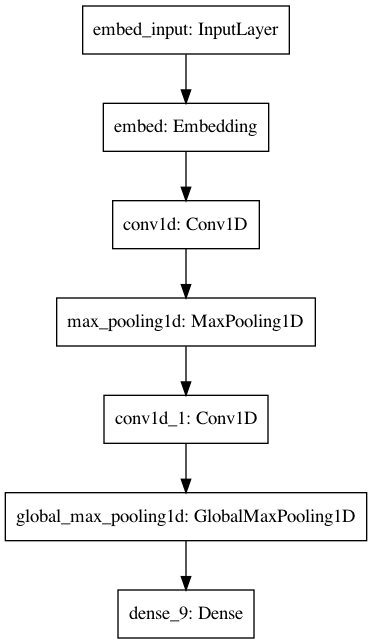

In [35]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

# model = keras.models.Sequential()
# model.add(layers.Embedding(max_features, 128,
#                            input_length=max_len,
#                            name='embed'))
# model.add(layers.Conv1D(32, 7, activation='relu'))
# model.add(layers.MaxPooling1D(5))
# model.add(layers.Conv1D(32, 7, activation='relu'))
# model.add(layers.GlobalMaxPooling1D())
# model.add(layers.Dense(1))
# model.summary()

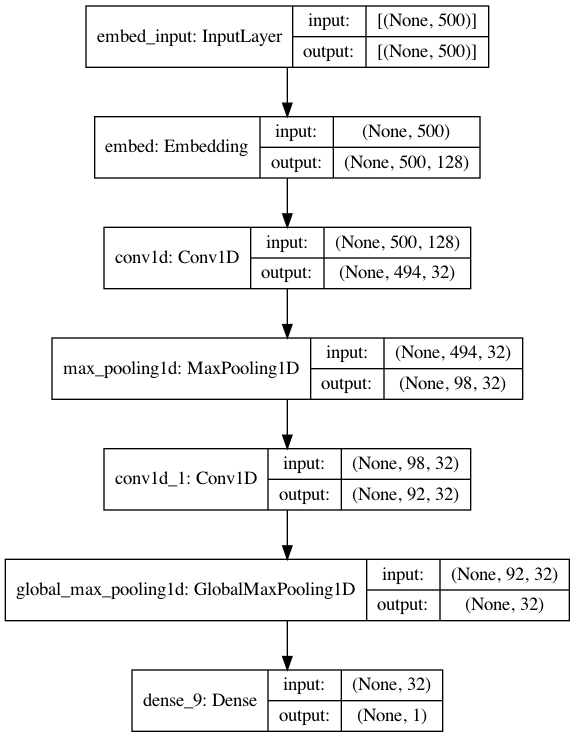

In [36]:
#from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model.png')

## SeparableCon2D

What if I told you that there’s a layer you can use as a drop-in replacement for Conv2D that will make your model lighter (fewer trainable weight parameters) and faster (fewer floating-point operations) and cause it to perform a few percentage points bet- ter on its task? That is precisely what the depthwise separable convolution layer does (SeparableConv2D). This layer performs a spatial convolution on each channel of its input, independently, before mixing output channels via a pointwise convolution (a 1 × 1 convolution), as shown in figure 7.16. This is equivalent to separating the learn- ing of spatial features and the learning of channel-wise features, which makes a lot of sense if you assume that spatial locations in the input are highly correlated, but differ- ent channels are fairly independent. It requires significantly fewer parameters and involves fewer computations, thus resulting in smaller, speedier models. And because it’s a more representationally efficient way to perform convolution, it tends to learn better representations using less data, resulting in better-performing models.

In [38]:
a = np.arange(6).reshape(2,3) 
print(a)

print(np.argmax(a))

print(np.argmax(a, axis=0))
#array([1, 1, 1])
print(np.argmax(a, axis=1))
#array([2, 2])

[[0 1 2]
 [3 4 5]]
5
[1 1 1]
[2 2]
